In [3]:
print('Vamos a Crear un notebook para la compra de un carro!');

Vamos a Crear un notebook para la compra de un carro!


In [4]:
import requests
import csv
import bs4
import pandas as pd

In [5]:
searchTextCar = "clio"
searchTextCar = (searchTextCar.replace(' ','-'))

In [6]:
r = requests.get('https://carros.mercadolibre.com.co/renault/mecanica/valle-del-cauca/'+searchTextCar)

In [7]:
soup = bs4.BeautifulSoup(r.text, 'html.parser')

In [8]:
with open('buyCard.csv', mode='w+') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['name','modelo', 'link', 'price', 'km', 'ciudad'])
    sections = soup.select('.ui-search-results ol')
    articles = []
    for section in sections:
        for article in section.children:
            name = article.select('.ui-search-item__title')[0].text
            link = (article.a['href'])
            price = article.select('.price-tag-fraction')[0].text
            modelo = (article.select('.ui-search-card-attributes__attribute')[0].text)
            km = (article.select('.ui-search-card-attributes__attribute')[1].text)
            ciudad = (article.select('.ui-search-item__location')[0].text)
            writer.writerow([name, modelo, link, price, km, ciudad])
    

In [9]:
listado = pd.read_csv('buyCard.csv',  encoding = 'ISO-8859-1')
# listado.head()
# listado.loc[5]['link']
# listado['modelo'].value_counts()
# listado.sort_values(by=['price']).loc[47]['link']
listado.sort_values(by=['price'])

,name,modelo,link,price,km,ciudad
10,Renault Clio 1.4 Rxt,2003,https://carro.mercadolibre.com.co/MCO-61204511...,12.000.000,157.980 Km,Florida
5,Renault Clio 1.4 Mtv,2003,https://carro.mercadolibre.com.co/MCO-61080152...,12.500.000,228.587 Km,Jamundí
4,Renault Clio F.iv Team Cool,2008,https://carro.mercadolibre.com.co/MCO-60984477...,15.500.000,118.000 Km,Sevilla
7,Renault Clio F.ii Dynamique,2007,https://carro.mercadolibre.com.co/MCO-61071581...,16.000.000,140.600 Km,Cali
15,Renault Clio 1.2 Campus,2013,https://carro.mercadolibre.com.co/MCO-60876217...,17.500.000,130.000 Km,Cali
0,Renault Clio 2013,2013,https://carro.mercadolibre.com.co/MCO-61287652...,20.000.000,93.000 Km,Cartago
12,Renault Clio 1.2 Style Ca,2016,https://carro.mercadolibre.com.co/MCO-61308140...,22.500.000,43.000 Km,Cali
3,Renault Clio 1.2 Campus,2015,https://carro.mercadolibre.com.co/MCO-60686532...,22.900.000,65.000 Km,Cali
13,Renault Clio 1.2 Style Ca,2016,https://carro.mercadolibre.com.co/MCO-61124674...,23.000.000,56.000 Km,Cali
9,Renault Clio 1.2 Sport Style,2016,https://carro.mercadolibre.com.co/MCO-61317457...,24.000.000,90.000 Km,Zarzal


In [10]:
listado.sort_values(by=['price']).loc[6]['link']

'https://carro.mercadolibre.com.co/MCO-611788572-renault-clio-2016-12-style-ca-_JM#position=7&type=item&tracking_id=9f1125a0-94f4-4efa-aa4f-f0e5f23b1c40'

In [11]:
%matplotlib inline

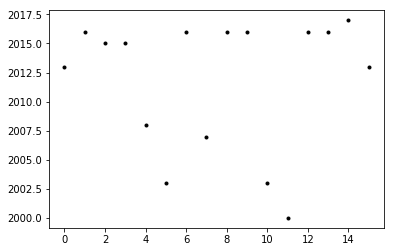

In [12]:
listado['modelo'].plot(style='k.')

In [14]:
grouped = listado.groupby('modelo')
grouped.describe().mean()
# grouped.mean()

ciudad  count     2.000
        unique    1.375
        freq      1.625
km      count     2.000
        unique    2.000
        freq      1.000
link    count     2.000
        unique    2.000
        freq      1.000
name    count     2.000
        unique    1.500
        freq      1.500
price   count     2.000
        unique    2.000
        freq      1.000
dtype: float64